In [3]:
# 🧩 Academic Performance Analysis
### Understanding how study habits, motivation, and external factors affect students' exam results.

In [4]:
pip install pandas sqlite3 ipython-sql

ERROR: Could not find a version that satisfies the requirement sqlite3 (from versions: none)
ERROR: No matching distribution found for sqlite3
Note: you may need to restart the kernel to use updated packages.


In [5]:
!pip install ipython-sql

In [6]:
!pip install --upgrade ipython-sql sqlalchemy sqlite-utils

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 384.9 kB/s eta 0:00:0000:0100:01
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.43
    Uninstalling SQLAlchemy-2.0.43:
      Successfully uninstalled SQLAlchemy-2.0.43


In [7]:
%load_ext sql
%sql sqlite:///students.db

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [8]:
import pandas as pd
import sqlite3

In [9]:
df = pd.read_csv("StudentPerformanceFactors.csv")

In [10]:
conn = sqlite3.connect("students.db")

In [11]:
#Dataset Overview

In [12]:
pd.read_sql("SELECT * FROM students LIMIT 10;", conn)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
5,19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,Medium,Medium,Public,Positive,3,No,Postgraduate,Near,Male,71
6,29,84,Medium,Low,Yes,7,68,Low,Yes,1,Low,Medium,Private,Neutral,2,No,High School,Moderate,Male,67
7,25,78,Low,High,Yes,6,50,Medium,Yes,1,High,High,Public,Negative,2,No,High School,Far,Male,66
8,17,94,Medium,High,No,6,80,High,Yes,0,Medium,Low,Private,Neutral,1,No,College,Near,Male,69
9,23,98,Medium,Medium,Yes,8,71,Medium,Yes,0,High,High,Public,Positive,5,No,High School,Moderate,Male,72


In [13]:
# Cleaning 

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [15]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [16]:
df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0], inplace=True)
df['Parental_Education_Level'].fillna(df['Parental_Education_Level'].mode()[0], inplace=True)
df['Distance_from_Home'].fillna(df['Distance_from_Home'].mode()[0], inplace=True)

/var/folders/qr/ylx4btj500ddg44fksrpsyz00000gn/T/ipykernel_82237/3528035378.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0], inplace=True)
/var/folders/qr/ylx4btj500ddg44fksrpsyz00000gn/T/ipykernel_82237/3528035378.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which

In [17]:
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [18]:
#Data Analysis

In [19]:
# 1.Comparison by gender

In [20]:
pd.read_sql("SELECT AVG(Exam_Score), MIN(Exam_Score), MAX(Exam_Score) FROM students;", conn)

,AVG(Exam_Score),MIN(Exam_Score),MAX(Exam_Score)
0,67.235659,55,101


In [21]:
pd.read_sql("SELECT Gender, AVG(Exam_Score) FROM students GROUP BY Gender;", conn)

,Gender,AVG(Exam_Score)
0,Female,67.244898
1,Male,67.228894


In [22]:
#There is no correlation between gender and exam results 

In [23]:
# 2.Correlation with school type, motivation level and attendance level

In [24]:
pd.read_sql("""
SELECT 
  School_Type,
  Motivation_Level,
  CASE
    WHEN Attendance < 70 THEN 'Low'
    WHEN Attendance BETWEEN 70 AND 90 THEN 'Medium'
    ELSE 'High'
  END AS Attendance_Level,
  ROUND(AVG(Exam_Score), 2) AS Avg_Score
FROM students
GROUP BY School_Type, Motivation_Level, Attendance_Level
ORDER BY Avg_Score DESC;
""", conn)

,School_Type,Motivation_Level,Attendance_Level,Avg_Score
0,Public,High,High,70.69
1,Private,High,High,70.48
2,Private,Medium,High,70.19
3,Public,Medium,High,70.14
4,Private,Low,High,69.84
5,Public,Low,High,69.82
6,Private,High,Medium,67.67
7,Public,High,Medium,67.64
8,Private,Medium,Medium,67.45
9,Public,Medium,Medium,67.40


In [25]:
#There is no significant correlation between school type and motivation + attendance level. 
#In both private and public schools students demonstrated high motivation and attandance level with high exam results.

In [26]:
# 3.Correlation with motivation level and attendance level

In [27]:
pd.read_sql("""
SELECT 
  Motivation_Level,
  CASE
    WHEN Attendance < 70 THEN 'Low'
    WHEN Attendance BETWEEN 70 AND 90 THEN 'Medium'
    ELSE 'High'
  END AS Attendance_Level,
  ROUND(AVG(Exam_Score), 2) AS Avg_Score
FROM students
GROUP BY Motivation_Level, Attendance_Level
ORDER BY Avg_Score DESC;
""", conn)

,Motivation_Level,Attendance_Level,Avg_Score
0,High,High,70.63
1,Medium,High,70.15
2,Low,High,69.83
3,High,Medium,67.65
4,Medium,Medium,67.41
5,Low,Medium,66.77
6,High,Low,64.83
7,Medium,Low,64.33
8,Low,Low,63.54


In [28]:
data = pd.read_sql("""
SELECT 
  Motivation_Level,
  CASE
    WHEN Attendance < 70 THEN 'Low'
    WHEN Attendance BETWEEN 70 AND 90 THEN 'Medium'
    ELSE 'High'
  END AS Attendance_Level,
  ROUND(AVG(Exam_Score), 2) AS Avg_Score
FROM students
GROUP BY Motivation_Level, Attendance_Level
ORDER BY Avg_Score DESC;
""", conn)

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

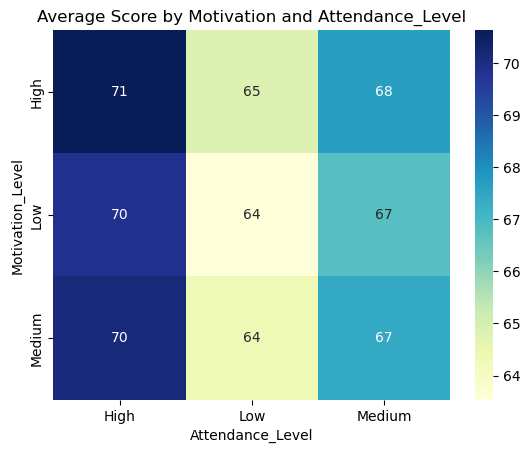

In [30]:
df = pd.DataFrame(data)
pivot = df.pivot_table(index='Motivation_Level', columns='Attendance_Level', values='Avg_Score')
sns.heatmap(pivot, annot=True, cmap='YlGnBu')
plt.title("Average Score by Motivation and Attendance_Level")
plt.show()

In [31]:
#It can be seen that students with High attendance level and Low motivation level have better results in comparison with students
#with High motivation level and Low attendance level. 
#This gives an idea that regular attendance tend to play crucial role in achieving the best results.

In [32]:
# 4.Correlation with number of studied hours and attendance level

In [33]:
pd.read_sql("SELECT Hours_Studied, AVG(Exam_Score) AS Avg_Score FROM students GROUP BY Hours_Studied ORDER BY Avg_Score DESC;", conn)

,Hours_Studied,Avg_Score
0,43,78.000000
1,39,74.714286
2,37,73.333333
3,38,72.714286
4,35,71.800000
5,36,71.181818
6,44,71.000000
7,1,71.000000
8,32,70.944444
9,34,70.724138


In [34]:
#As expected students who studied between 35-43 hours have gotten exam results higher than average from 71 to 78 points, while average is 67
#However, there is an unexpected outlier: stduents who studied only 1 hour received 70 points in average.

In [35]:
# 5.Correlation with educational level of parents 

In [36]:
pd.read_sql("SELECT Parental_Education_Level, AVG(Exam_Score) AS Avg_Score FROM students GROUP BY Parental_Education_Level ORDER BY Avg_Score DESC;", conn)

,Parental_Education_Level,Avg_Score
0,Postgraduate,67.970881
1,College,67.315737
2,None,67.055556
3,High School,66.893577


In [ ]:
#Students with parents whose education level is "postgraduate" tend to obtain higher exam score results

In [ ]:
# 6.Correlation with motivational level of studnets and quality of teachers 

In [38]:
pd.read_sql("SELECT Motivation_Level, Teacher_Quality, AVG(Exam_Score) AS Avg_Score FROM students GROUP BY Motivation_Level, Teacher_Quality ORDER BY Avg_Score DESC;", conn)

,Motivation_Level,Teacher_Quality,Avg_Score
0,High,High,68.283951
1,Medium,High,67.628125
2,High,Medium,67.552803
3,Low,High,67.335052
4,Medium,Medium,67.254912
5,High,Low,67.029851
6,Medium,None,67.025641
7,Medium,Low,66.994550
8,Low,None,66.615385
9,Low,Medium,66.572890


In [39]:
data = pd.read_sql("SELECT Motivation_Level, Teacher_Quality, AVG(Exam_Score) AS Avg_Score FROM students GROUP BY Motivation_Level, Teacher_Quality ORDER BY Avg_Score DESC;", conn)

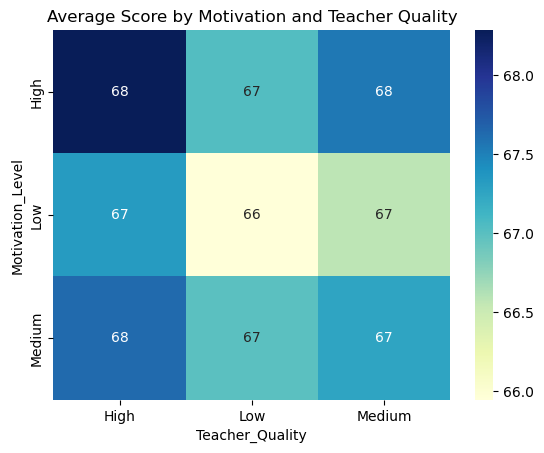

In [40]:
df = pd.DataFrame(data)
pivot = df.pivot_table(index='Motivation_Level', columns='Teacher_Quality', values='Avg_Score')
sns.heatmap(pivot, annot=True, cmap='YlGnBu')
plt.title("Average Score by Motivation and Teacher Quality")
plt.show()

In [ ]:
#There is no correlation between exam scores and motivation + teacher's quality

In [ ]:
# 7.Correlation with Internet_Access 

In [42]:
pd.read_sql("SELECT Internet_Access, AVG(Exam_Score) FROM students GROUP BY Internet_Access;", conn)

,Internet_Access,AVG(Exam_Score)
0,No,66.535070
1,Yes,67.292895


In [ ]:
#Students with the Internet Access have slightly higher exam results

In [43]:
# 8. Correlation with Sleep_Hours

In [44]:
pd.read_sql("SELECT Sleep_Hours, AVG(Exam_Score) FROM students GROUP BY Sleep_Hours ORDER BY AVG(Exam_Score) DESC;", conn)

,Sleep_Hours,AVG(Exam_Score)
0,4,67.627832
1,5,67.297842
2,7,67.242964
3,8,67.218728
4,6,67.194767
5,9,67.149677
6,10,67.137821


In [ ]:
#Surprisingly students with less number of sleep hours obtained better exam results

In [ ]:
# 9. Correlation with motivation level, sleep level and study level

In [46]:
pd.read_sql("""
SELECT 
  TRIM(Motivation_Level) AS Motivation_Level,
  CASE
    WHEN Attendance IS NULL THEN 'Unknown'
    WHEN Attendance < 70 THEN 'Low'
    WHEN Attendance BETWEEN 70 AND 90 THEN 'Medium'
    ELSE 'High'
  END AS Attendance_Level,
  CASE
    WHEN Sleep_Hours IS NULL THEN 'Unknown'
    WHEN Sleep_Hours <= 5 THEN 'Low'
    WHEN Sleep_Hours BETWEEN 6 AND 7 THEN 'Medium'
    ELSE 'High'
  END AS Sleep_Level,
  CASE
    WHEN Hours_Studied IS NULL THEN 'Unknown'
    WHEN Hours_Studied < 10 THEN 'Low'
    WHEN Hours_Studied BETWEEN 10 AND 25 THEN 'Medium'
    ELSE 'High'
  END AS Study_Level,
  ROUND(AVG(Exam_Score), 2) AS Avg_Score
FROM students
GROUP BY TRIM(Motivation_Level), Attendance_Level, Sleep_Level, Study_Level
ORDER BY Avg_Score DESC;
""", conn)
#Функция TRIM() — это SQL-инструмент, который удаляет лишние пробелы в начале и в конце текста

,Motivation_Level,Attendance_Level,Sleep_Level,Study_Level,Avg_Score
0,High,High,Low,High,75.00
1,Low,High,Medium,High,73.97
2,High,High,High,High,73.82
3,High,High,Medium,High,73.74
4,Medium,High,Medium,High,73.17
...,...,...,...,...,...
76,Medium,Low,Medium,Low,60.23
77,High,Low,Low,Low,60.00
78,Low,Low,Low,Low,59.67
79,Low,Low,High,Low,59.50


In [ ]:
#The data shows that students with high attendance and strong study habits tend to achieve the best exam scores, regardless of their motivation level.
#Interestingly, students who slept less also performed well, suggesting that they might spend more time studying. 
#This implies that attendance and study time have a stronger impact on academic performance than motivation or sleep duration.

In [47]:
#Correlation with learning disabilities

In [48]:
pd.read_sql("SELECT Learning_Disabilities, AVG(Exam_Score) FROM students GROUP BY Learning_Disabilities;", conn)
#Correlation is not significant

,Learning_Disabilities,AVG(Exam_Score)
0,No,67.349120
1,Yes,66.270504


In [49]:
# 10. Correlation with Tutoring Sessions and Hours Studied 

In [50]:
pd.read_sql("""
SELECT 
  CASE
    WHEN Tutoring_Sessions IS NULL THEN 'Unknown'
    WHEN Tutoring_Sessions < 4 THEN 'Low'
    WHEN Tutoring_Sessions BETWEEN 4 AND 6 THEN 'Medium'
    ELSE 'High'
  END AS Tutoring_Level,
  CASE
    WHEN Hours_Studied IS NULL THEN 'Unknown'
    WHEN Hours_Studied < 10 THEN 'Low'
    WHEN Hours_Studied BETWEEN 10 AND 25 THEN 'Medium'
    ELSE 'High'
  END AS Study_Level,
  ROUND(AVG(Exam_Score), 2) AS Avg_Score
FROM students
GROUP BY Tutoring_Level, Study_Level
ORDER BY Avg_Score DESC;
""", conn)

,Tutoring_Level,Study_Level,Avg_Score
0,Medium,High,71.72
1,High,Medium,69.75
2,Low,High,69.73
3,Medium,Medium,68.07
4,Low,Medium,66.73
5,Medium,Low,65.48
6,Low,Low,63.68


In [ ]:
#Tutoring helps, but self-study has the strongest impact on academic performance.
#Tutoring can enhance results for moderately active students, but it cannot replace personal effort and consistent study habits.

In [51]:
# 11. Correlation between resources and number of studied hours

In [52]:
pd.read_sql("""
SELECT 
  CASE
    WHEN Hours_Studied IS NULL THEN 'Unknown'
    WHEN Hours_Studied < 10 THEN 'Low'
    WHEN Hours_Studied BETWEEN 10 AND 25 THEN 'Medium'
    ELSE 'High'
  END AS Study_Level,
  ROUND(AVG(Exam_Score), 2) AS Avg_Score,
  Access_to_Resources
FROM students
GROUP BY Access_to_Resources, Study_Level
ORDER BY Avg_Score DESC;
""", conn)

,Study_Level,Avg_Score,Access_to_Resources
0,High,70.53,High
1,High,69.89,Medium
2,High,68.68,Low
3,Medium,67.68,High
4,Medium,66.70,Medium
5,Medium,65.84,Low
6,Low,64.86,High
7,Low,63.63,Medium
8,Low,62.74,Low


In [ ]:
#Access to resources doesn't really influence students with low level of studied hours, it mostly enhance results of those who study a lot.

In [53]:
# 12. Teacher_Quality vs. School_Type

In [54]:
pd.read_sql("SELECT Teacher_Quality,School_Type, AVG(Exam_Score) AS Avg_Score FROM students GROUP BY Teacher_Quality,School_Type ORDER BY Avg_Score DESC;", conn)

,Teacher_Quality,School_Type,Avg_Score
0,High,Public,67.777283
1,High,Private,67.451667
2,Medium,Private,67.262584
3,Low,Private,67.046392
4,Medium,Public,67.042444
5,None,Public,66.763636
6,Low,Public,66.630670
7,None,Private,66.347826


In [ ]:
#There’s no strong correlation between Teacher_Quality and Exam_Score

In [55]:
# 13. Peer_Influence and Motivation_Level

In [56]:
pd.read_sql("SELECT Motivation_Level, Peer_Influence, AVG(Exam_Score) AS Avg_Score FROM students GROUP BY Motivation_Level, Peer_Influence ORDER BY Avg_Score DESC;", conn)

,Motivation_Level,Peer_Influence,Avg_Score
0,High,Positive,68.011257
1,Medium,Positive,67.788956
2,High,Neutral,67.660000
3,Medium,Neutral,67.322509
4,High,Negative,67.209790
5,Low,Positive,67.079183
6,Low,Neutral,66.655360
7,Medium,Negative,66.448071
8,Low,Negative,66.309353


In [ ]:
#It can be seen that positive peer influence has positively enhanced exam results for students with high/medium motivation)

In [57]:
# 14. Family_Income + Parental_Involvement

In [58]:
pd.read_sql("SELECT Family_Income, Parental_Involvement, AVG(Exam_Score) AS Avg_Score FROM students GROUP BY Family_Income, Parental_Involvement ORDER BY Avg_Score DESC;", conn)

,Family_Income,Parental_Involvement,Avg_Score
0,High,High,68.680217
1,Medium,High,68.271077
2,Low,High,67.631510
3,High,Medium,67.537750
4,High,Low,67.398406
5,Medium,Medium,67.239130
6,Low,Medium,66.738185
7,Medium,Low,66.190291
8,Low,Low,66.052539


In [ ]:
#It can be seen that family income doesn't really have an influence on exam results, but parental_involvement definitely increases scores

In [59]:
# 15. Learning_Disabilities × Support Factors (Learning_Disabilities and Tutoring_Level or Parental_Involvement)

In [60]:
pd.read_sql("""
SELECT 
  CASE
    WHEN Tutoring_Sessions IS NULL THEN 'Unknown'
    WHEN Tutoring_Sessions < 4 THEN 'Low'
    WHEN Tutoring_Sessions BETWEEN 4 AND 6 THEN 'Medium'
    ELSE 'High'
  END AS Tutoring_Level,
  ROUND(AVG(Exam_Score), 2) AS Avg_Score,
  Learning_Disabilities,
  Parental_Involvement
FROM students
WHERE Learning_Disabilities LIKE 'Yes'
GROUP BY Tutoring_Level, Learning_Disabilities, Parental_Involvement
ORDER BY Avg_Score DESC;
""", conn)

,Tutoring_Level,Avg_Score,Learning_Disabilities,Parental_Involvement
0,High,71.00,Yes,High
1,Medium,70.31,Yes,High
2,Medium,67.53,Yes,Medium
3,Low,66.80,Yes,High
4,Medium,66.43,Yes,Low
5,Low,65.92,Yes,Medium
6,Low,65.49,Yes,Low


In [ ]:
#It can be seen that students with learning disabilities were able to recieve high exam scores due to high level of parental involvement 
#and high level of tutoring support

In [61]:
# 16. Distance_from_Home

In [62]:
pd.read_sql("SELECT Distance_from_Home, AVG(Exam_Score) AS Avg_Score FROM students GROUP BY Distance_from_Home ORDER BY Avg_Score DESC;", conn)

,Distance_from_Home,Avg_Score
0,Near,67.512101
1,Moderate,66.981481
2,Far,66.457447
3,None,66.432836


In [63]:
pd.read_sql("""
SELECT 
  CASE
    WHEN Attendance IS NULL THEN 'Unknown'
    WHEN Attendance < 70 THEN 'Low'
    WHEN Attendance BETWEEN 70 AND 90 THEN 'Medium'
    ELSE 'High'
  END AS Attendance_Level,
  ROUND(AVG(Exam_Score), 2) AS Avg_Score,
  Distance_from_Home
FROM students
GROUP BY Attendance_Level, Distance_from_Home 
ORDER BY Avg_Score DESC;
""", conn)

,Attendance_Level,Avg_Score,Distance_from_Home
0,High,70.43,Near
1,High,69.79,Moderate
2,High,69.54,Far
3,High,69.42,None
4,Medium,67.49,Near
5,Medium,67.12,Moderate
6,Medium,66.58,Far
7,Medium,66.35,None
8,Low,64.46,Near
9,Low,64.27,None


In [ ]:
#It can be seen that students who live near with school achieve better results. 
#However, when you compare level of attendance you can see that students with high level of attendance and high exam scores don't necessary live near school.

In [64]:
pd.read_sql("""
SELECT 
  CASE
    WHEN Sleep_Hours IS NULL THEN 'Unknown'
    WHEN Sleep_Hours <= 5 THEN 'Low'
    WHEN Sleep_Hours BETWEEN 6 AND 7 THEN 'Medium'
    ELSE 'High'
  END AS Sleep_Level,
  ROUND(AVG(Exam_Score), 2) AS Avg_Score,
  Distance_from_Home
FROM students
GROUP BY Sleep_Level, Distance_from_Home
ORDER BY Avg_Score DESC;
""", conn)
#No correlation between level of sleep and distance from home

,Sleep_Level,Avg_Score,Distance_from_Home
0,Low,67.65,Near
1,Medium,67.52,Near
2,High,67.45,Near
3,Low,67.42,Far
4,Medium,67.04,Moderate
5,Low,67.00,None
6,Low,66.94,Moderate
7,High,66.93,Moderate
8,High,66.45,Far
9,High,66.39,None


In [65]:
# 17. Sleep_Hours × Motivation

In [66]:
pd.read_sql("""
SELECT 
  TRIM(Motivation_Level) AS Motivation_Level,
  CASE
    WHEN Sleep_Hours IS NULL THEN 'Unknown'
    WHEN Sleep_Hours <= 5 THEN 'Low'
    WHEN Sleep_Hours BETWEEN 6 AND 7 THEN 'Medium'
    ELSE 'High'
  END AS Sleep_Level,
  ROUND(AVG(Exam_Score), 2) AS Avg_Score
FROM students
GROUP BY TRIM(Motivation_Level), Sleep_Level
ORDER BY Avg_Score DESC;
""", conn)

,Motivation_Level,Sleep_Level,Avg_Score
0,High,Low,67.79
1,High,High,67.76
2,High,Medium,67.63
3,Medium,Medium,67.40
4,Medium,Low,67.32
5,Low,Low,67.26
6,Medium,High,67.25
7,Low,High,66.67
8,Low,Medium,66.66


In [ ]:
#We can't see significant differences in results of highly motivated students with low and high level of sleep, both of these groups received high exam results 

In [ ]:
#Conclusions

In [ ]:
#Overall, the analysis suggests that individual effort and consistency play a much greater role in students’ academic performance than external factors such as school type, teacher quality, or family income.
#Consistent study habits and attendance are the key drivers of academic success, while external support systems act as secondary amplifiers rather than primary determinants.